In [1]:
pip install torchvision pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [2]:
pip install torchattacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.25.1 which is incompatible.
tweepy 4.13.0 requires requests<3,>=2.27.0, but you have requests 2.25.1 which is incompatible.
yfinance 0.2.22 requires requests>=2.26, but you have requests 2.25.1 which is incompatib

In [3]:
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models

import time
import gc
import numpy as np
import pandas as pd

import os
import time

import random
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Read / Import Data

In [4]:
batch_size = 128
NUM_CLASSES = 10

## transform the data into 'tensors' using the 'transforms' module
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize to 224x224 (height x width)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

## download training dataset
trainset = datasets.CIFAR10(root='./data', train=True,
                                 transform=transform, download=True)

testset = datasets.CIFAR10(root='./data', train=False,
                                 transform=transform, download=True)

trainloader = DataLoader(dataset=trainset, batch_size=batch_size,
                          num_workers=0, shuffle=True)

testloader = DataLoader(dataset=testset, batch_size=batch_size,
                         num_workers=0, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 105668964.62it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
# Check the dimensions of a batch:
for images, labels in trainloader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 3, 224, 224])
Image label dimensions: torch.Size([128])


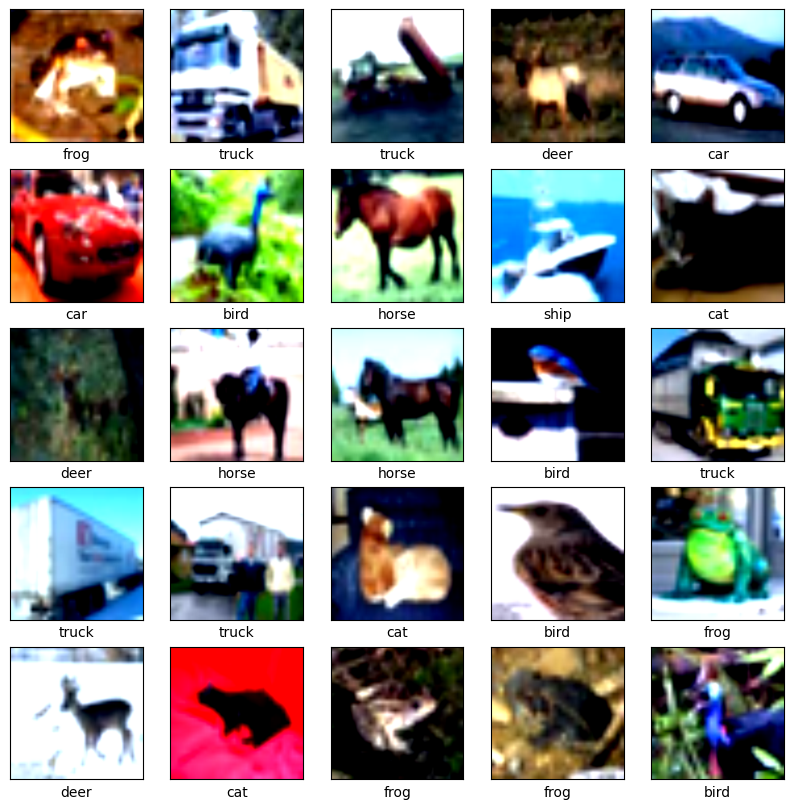

In [6]:
# Show training images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = trainset[i]
    # Denormalize the image to display it correctly
    image = image / 2 + 0.5
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
    plt.xlabel(classes[label])
plt.show()

## Load Data on DataLoader

In [7]:
# Feed data in batches into deep-learning models
trainloader = DataLoader(dataset=trainset, batch_size=batch_size,
                          num_workers=0, shuffle=True)

testloader = DataLoader(dataset=testset, batch_size=batch_size,
                         num_workers=0, shuffle=False)

In [8]:
## Check the dimensions of a batch:
for images, labels in trainloader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 3, 224, 224])
Image label dimensions: torch.Size([128])


## Load the Pre-Trained Model

In [9]:
model = models.resnet18(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 205MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Freeze the Model

In [10]:
for param in model.parameters():
    param.requires_grad = False

In [11]:
# Replace the output layer with your own output layer
model.fc = nn.Sequential(
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, NUM_CLASSES)
)


## Create a model, optimizer and criterion

In [12]:
# Hyperparameters
random_seed = 623
learning_rate = 0.0002
num_epochs = 20

In [13]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Citerion
criterion = nn.CrossEntropyLoss()

In [14]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', DEVICE)
# Set my pretrained model to be run on GPU
model = model.to(DEVICE)

Device: cuda:0


## Train Model

In [15]:
gc.collect()

49175

In [16]:
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

In [17]:
# Custom Accuracy Function
def compute_accuracy(model, data_loader):
    model.eval()
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):

        features = features.to(DEVICE)
        targets = targets.to(DEVICE)

        logits = model(features)
        _, predicted_labels = torch.max(logits, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

# Custom loss Function
def compute_epoch_loss(model, data_loader):
    model.eval()
    curr_loss, num_examples = 0., 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.to(DEVICE)
            targets = targets.to(DEVICE)
            logits = model(features)
            loss = F.cross_entropy(logits, targets, reduction='sum')
            num_examples += targets.size(0)
            curr_loss += loss

        curr_loss = curr_loss / num_examples
        return curr_loss

In [18]:
start_time = time.time()
for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, targets) in enumerate(trainloader):

        features = features.to(DEVICE)
        targets = targets.to(DEVICE)

        ## forward + backprop + loss
        logits = model(features)
        cost = criterion(logits, targets)
        optimizer.zero_grad()

        cost.backward()

        ### UPDATE MODEL PARAMETERS
        optimizer.step()

        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f'
                   %(epoch+1, num_epochs, batch_idx,
                     len(trainloader), cost))

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        train_acc = compute_accuracy(model, trainloader)
        val_acc = compute_accuracy(model, testloader)
        train_loss = compute_epoch_loss(model, trainloader)
        val_loss = compute_epoch_loss(model, testloader)

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    print('Epoch: %03d/%03d | Train: %.3f%% | Loss: %.3f' % (
              epoch+1, num_epochs,
              compute_accuracy(model, trainloader),
              compute_epoch_loss(model, trainloader)))


    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/020 | Batch 0000/0391 | Cost: 2.3509
Epoch: 001/020 | Batch 0050/0391 | Cost: 1.7477
Epoch: 001/020 | Batch 0100/0391 | Cost: 1.3910
Epoch: 001/020 | Batch 0150/0391 | Cost: 1.1577
Epoch: 001/020 | Batch 0200/0391 | Cost: 0.8618
Epoch: 001/020 | Batch 0250/0391 | Cost: 0.9938
Epoch: 001/020 | Batch 0300/0391 | Cost: 0.9193
Epoch: 001/020 | Batch 0350/0391 | Cost: 1.0079
Epoch: 001/020 | Train: 77.264% | Loss: 0.713
Time elapsed: 8.70 min
Epoch: 002/020 | Batch 0000/0391 | Cost: 0.8176
Epoch: 002/020 | Batch 0050/0391 | Cost: 0.7183
Epoch: 002/020 | Batch 0100/0391 | Cost: 0.7961
Epoch: 002/020 | Batch 0150/0391 | Cost: 0.9367
Epoch: 002/020 | Batch 0200/0391 | Cost: 0.6705
Epoch: 002/020 | Batch 0250/0391 | Cost: 0.6403
Epoch: 002/020 | Batch 0300/0391 | Cost: 1.0124
Epoch: 002/020 | Batch 0350/0391 | Cost: 0.6564
Epoch: 002/020 | Train: 79.484% | Loss: 0.616
Time elapsed: 17.27 min
Epoch: 003/020 | Batch 0000/0391 | Cost: 0.7679
Epoch: 003/020 | Batch 0050/0391 | Cost: 0.62

In [19]:
# Save the trained model
torch.save(model.state_dict(), 'trainedModel20ephocs.pth')

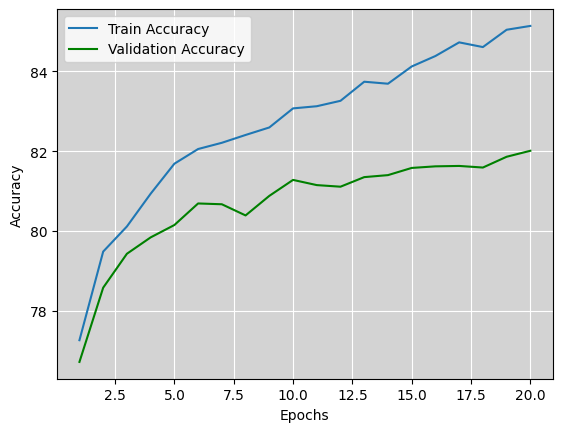

In [20]:
plt.plot(range(1, num_epochs + 1), [acc.detach().cpu() for acc in train_acc_list], label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), [acc.detach().cpu() for acc in val_acc_list], label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(color='white')
plt.gca().set_facecolor('lightgray')
plt.show()

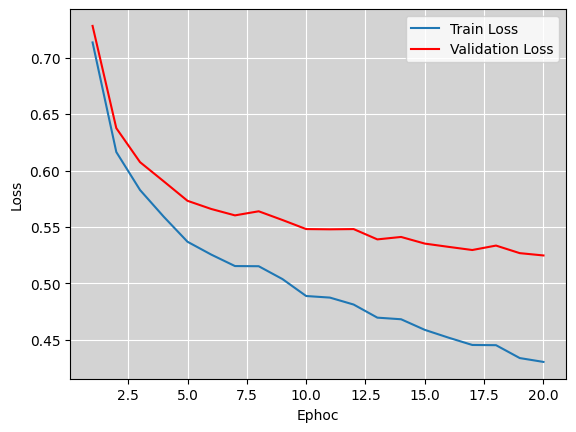

In [21]:
plt.plot(range(1, num_epochs + 1), [loss.detach().cpu().numpy() for loss in train_loss_list], label='Train Loss')
plt.plot(range(1, num_epochs + 1), [loss.detach().cpu().numpy() for loss in val_loss_list], label='Validation Loss', color='red')
plt.xlabel('Ephoc')
plt.ylabel('Loss')
plt.legend()
plt.grid(color='white')
plt.gca().set_facecolor('lightgray')
plt.show()

## Test the Model

In [22]:
with torch.set_grad_enabled(False): # save memory during inference
    print('Test accuracy: %.2f%%' % (compute_accuracy(model, testloader)))

Test accuracy: 82.01%


In [23]:
for batch_idx, (features, targets) in enumerate(testloader):

    features = features
    targets = targets
    break

logits = model(features.to(DEVICE))
_, predicted_labels = torch.max(logits, 1)

In [24]:
predicted_labels

tensor([3, 8, 8, 0, 6, 6, 9, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 5, 3, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 9, 9, 5, 0, 6, 5, 3, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 3, 3, 5, 3, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 3,
        8, 8, 9, 2, 9, 3, 5, 8, 8, 1, 1, 7, 3, 7, 2, 0, 8, 9, 8, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 6, 0, 6, 6, 1, 3, 0, 3, 3, 3,
        8, 3, 1, 2, 8, 2, 8, 3], device='cuda:0')

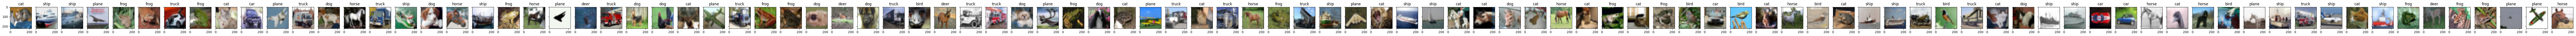

In [25]:
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

n_images = 100

fig, axes = plt.subplots(nrows=1, ncols=n_images,
                         sharex=True, sharey=True, figsize=(150, 70.5))
orig_images = features[:n_images]

for i in range(n_images):
    curr_img = orig_images[i].detach().to(torch.device('cpu'))
    curr_img = unnormalize(curr_img,
                           torch.tensor([0.485, 0.456, 0.406]),
                           torch.tensor([0.229, 0.224, 0.225]))
    curr_img = curr_img.permute((1, 2, 0))
    axes[i].imshow(curr_img)
    axes[i].set_title(classes[predicted_labels[i]])

## Select Image

In [56]:
selected_image = orig_images[77].unsqueeze(0)

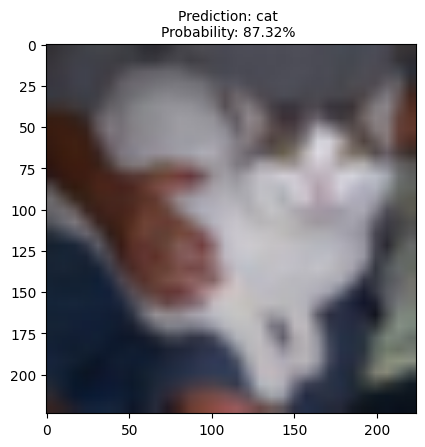

In [57]:
model.eval()
with torch.no_grad():
    logits_original = model(selected_image.to(DEVICE))
    _, predicted_original = torch.max(logits_original, 1)

# Accuracy
accuracy = torch.softmax(logits_original, dim=1)[0][predicted_original.item()].item() * 100

plt.imshow(selected_image.squeeze().permute(1, 2, 0))
plt.text(110, -5, "Prediction: {}\nProbability: {:.2f}%".format(classes[predicted_original.item()], accuracy), size=10, ha="center")
plt.show()

## L2 norm PGD attack

In [58]:
import torchattacks
import torchvision.transforms as transforms

atk = torchattacks.PGDL2(model, eps=0.6, alpha=0.3, steps=10, random_start=True)
adv_image = atk(selected_image.to(DEVICE), predicted_original.to(DEVICE))

# Get the predictions

with torch.no_grad():
    logits_adversarial = model(adv_image)
    _, predicted_adversarial = torch.max(logits_adversarial, 1)

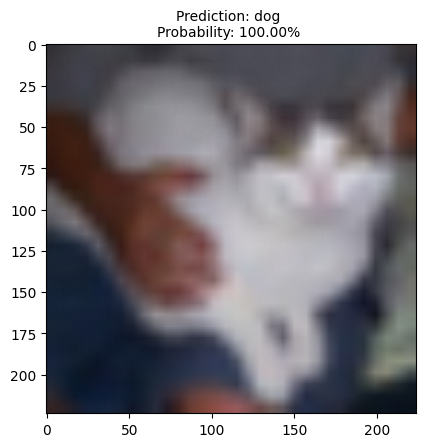

In [59]:
import torch.nn.functional as F

output_probs = F.softmax(logits_adversarial, dim=1)
x_pred_prob = torch.max(output_probs.data, 1)[0][0].item() * 100
rounded_pred_prob = round(x_pred_prob, 4)

plt.imshow(adv_image.squeeze().permute(1, 2, 0).cpu())
plt.text(110, -5, "Prediction: {}\nProbability: {:.2f}%".format(classes[predicted_adversarial.item()], rounded_pred_prob), size=10, ha="center")
plt.show()

## $L_∞$ norm PGD attack

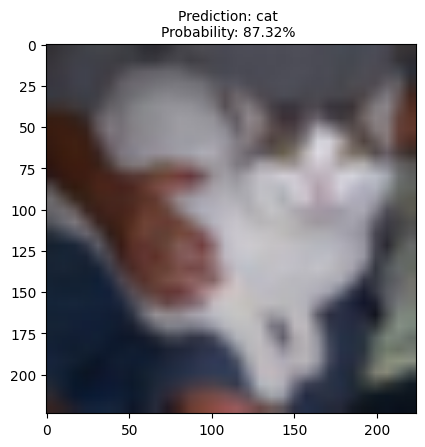

In [61]:
selectImage = orig_images[77].unsqueeze(0)

model.eval()
with torch.no_grad():
    logitsOriginal = model(selectImage.to(DEVICE))
    _, predictedOriginal = torch.max(logitsOriginal, 1)

# Accuracy
accrc = torch.softmax(logitsOriginal, dim=1)[0][predictedOriginal.item()].item() * 100

plt.imshow(selectImage.squeeze().permute(1, 2, 0))
plt.text(110, -5, "Prediction: {}\nProbability: {:.2f}%".format(classes[predictedOriginal.item()], accrc), size=10, ha="center")
plt.show()

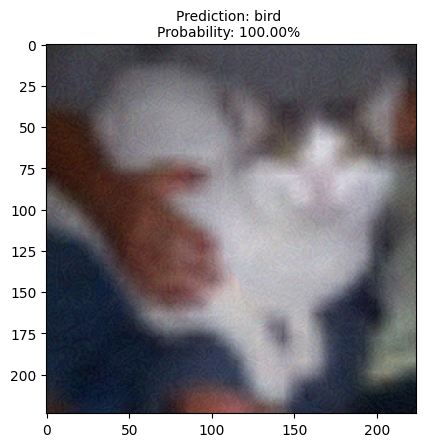

In [62]:
atkInf = torchattacks.PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
advImageInf = atkInf(selectImage.to(DEVICE), predictedOriginal.to(DEVICE))

# Get the predictions
with torch.no_grad():
    logitsAdversarial = model(advImageInf)
    _, predictedAdversarial = torch.max(logitsAdversarial, 1)

outputProbs = F.softmax(logitsAdversarial, dim=1)
xPredProb = torch.max(outputProbs.data, 1)[0][0].item() * 100
roundedPredProb = round(xPredProb, 4)

plt.imshow(advImageInf.squeeze().permute(1, 2, 0).cpu())
plt.text(110, -5, "Prediction: {}\nProbability: {:.2f}%".format(classes[predictedAdversarial.item()], roundedPredProb), size=10, ha="center")
plt.show()